In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(3844, 2)

In [3]:
df.head()

,Time,domain
0,2022-09-08 15:58:59,www.google.com
1,2022-09-08 16:00:14,www.viki.com
2,2022-09-08 16:03:48,www.viki.com
3,2022-09-08 16:04:56,accounts.google.com
4,2022-09-08 19:02:33,www.google.com


In [4]:
df.tail()

,Time,domain
3839,2022-11-06 22:00:12,webauth.umbc.edu
3840,2022-11-06 22:00:12,webauth.umbc.edu
3841,2022-11-06 22:00:39,blackboard.umbc.edu
3842,2022-11-06 22:01:07,github.com
3843,2022-11-06 22:07:10,github.com


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-09-08 15:58:59,www.google.com
1,2022-09-08 16:00:14,www.viki.com
2,2022-09-08 16:03:48,www.viki.com
3,2022-09-08 16:04:56,accounts.google.com
4,2022-09-08 19:02:33,www.google.com


In [14]:
df['domain'].value_counts()[:50]

www.google.com                      1011
webauth.umbc.edu                     681
blackboard.umbc.edu                  326
my3.my.umbc.edu                      180
github.com                           141
mail.google.com                      113
stackoverflow.com                     72
my.umbc.edu                           65
my.sagaeducation.org                  62
www.macys.com                         55
docs.google.com                       55
www.youtube.com                       53
web.whatsapp.com                      50
www.coach.com                         47
www.fossil.com                        45
cr-mountridgeapts.securecafe.com      44
umbcstudents-md.safecolleges.com      40
csprd-web.ps.umbc.edu                 38
app.docusign.com                      32
www.online-tax.net                    31
www.geeksforgeeks.org                 30
www.w3schools.com                     30
na2.docusign.net                      30
www.ilovepdf.com                      30
account.docusign

<AxesSubplot:>

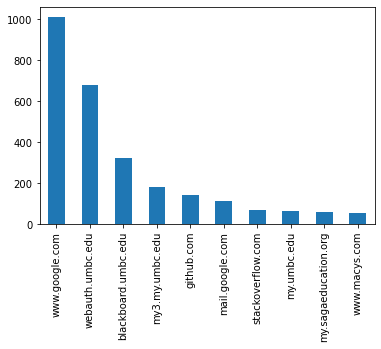

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     154
1      28
2      14
3       9
6       9
7      45
8      83
9     120
10    128
11    134
12    162
13    119
14    224
15    201
16    202
17    196
18    265
19    556
20    332
21    334
22    313
23    216
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

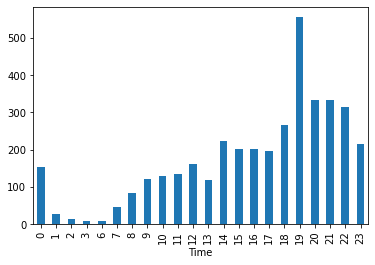

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-09-08 15:58:59,www.google.com,Thursday,3
1,2022-09-08 16:00:14,www.viki.com,Thursday,3
2,2022-09-08 16:03:48,www.viki.com,Thursday,3
3,2022-09-08 16:04:56,accounts.google.com,Thursday,3
4,2022-09-08 19:02:33,www.google.com,Thursday,3


In [19]:
df['Day'].value_counts()

Monday       867
Thursday     803
Tuesday      694
Sunday       501
Wednesday    495
Friday       308
Saturday     176
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    867
1    694
2    495
3    803
4    308
5    176
6    501
Name: DayIndex, dtype: int64

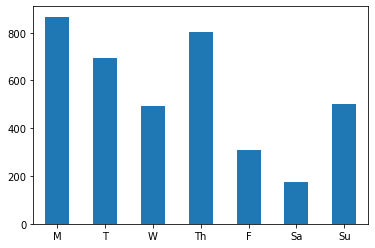

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-09-08 15:58:59,www.google.com,Thursday,3,False
1,2022-09-08 16:00:14,www.viki.com,Thursday,3,False
2,2022-09-08 16:03:48,www.viki.com,Thursday,3,False
3,2022-09-08 16:04:56,accounts.google.com,Thursday,3,False
4,2022-09-08 19:02:33,www.google.com,Thursday,3,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
73,2022-09-10 11:45:28,www.youtube.com,Saturday,5,True
74,2022-09-10 11:45:56,www.primevideo.com,Saturday,5,True
75,2022-09-10 11:46:05,www.google.com,Saturday,5,True
76,2022-09-10 11:47:52,www.viki.com,Saturday,5,True
77,2022-09-10 11:47:58,www.viki.com,Saturday,5,True


In [25]:
weekday['domain'].value_counts()[:5]

www.google.com         756
webauth.umbc.edu       587
blackboard.umbc.edu    273
my3.my.umbc.edu        144
github.com             118
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

www.google.com         255
webauth.umbc.edu        94
blackboard.umbc.edu     53
my3.my.umbc.edu         36
github.com              23
Name: domain, dtype: int64

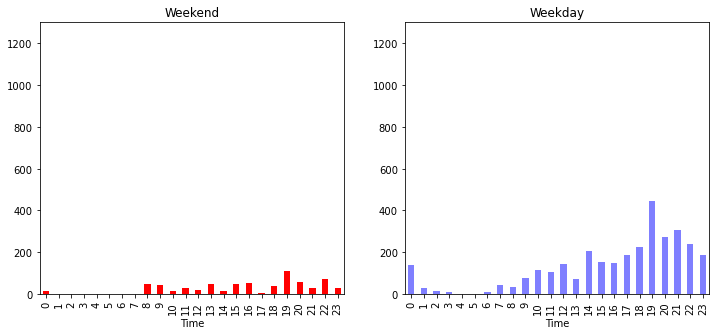

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

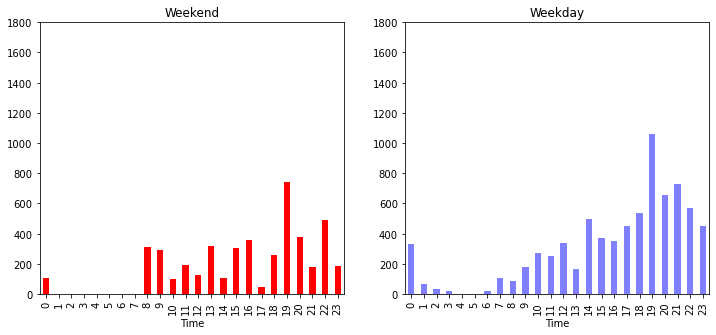

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

www.google.com          1011
webauth.umbc.edu         681
blackboard.umbc.edu      326
my3.my.umbc.edu          180
github.com               141
mail.google.com          113
stackoverflow.com         72
my.umbc.edu               65
my.sagaeducation.org      62
www.macys.com             55
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

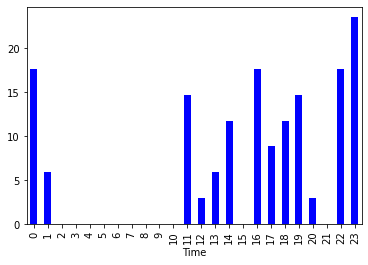

In [33]:
_= show_domain_stats('Youtube', 'blue')

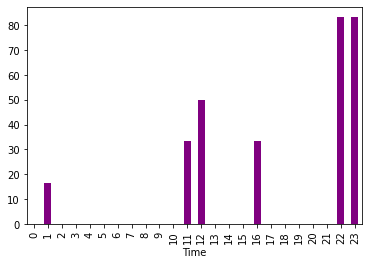

In [34]:
_= show_domain_stats('viki', 'purple')

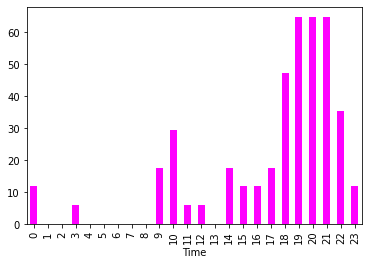

In [35]:
_ = show_domain_stats('stackover', 'magenta')


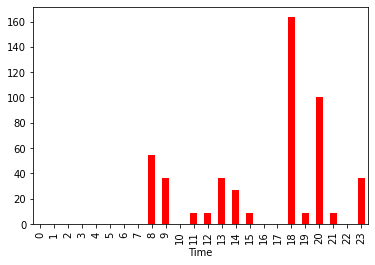

In [36]:
_ = show_domain_stats('macy', 'red')

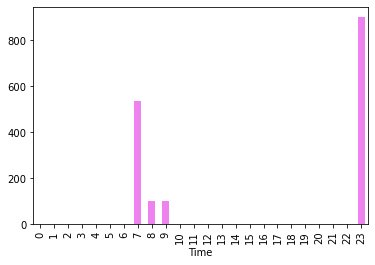

In [37]:
_ = show_domain_stats('amazon', 'violet')

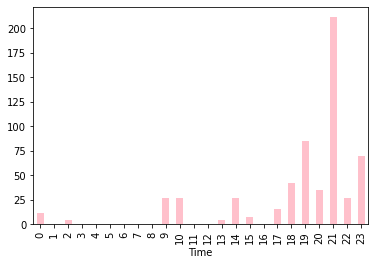

In [38]:
_ = show_domain_stats('github', 'pink')

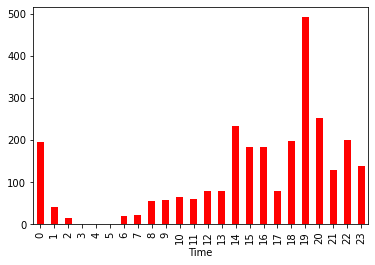

In [39]:
_ = show_domain_stats('umbc', 'red')

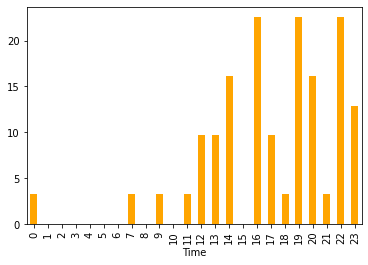

In [44]:
_ = show_domain_stats('Whatsapp', 'orange')

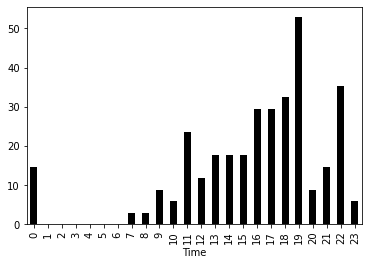

In [41]:
_=show_domain_stats('mail', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. Is this a work computer/personal computer?

        All the browsing history seems to be more personal data. Though most of the searches are regarding university but I consider it as personal computer because there are some searches for shopping in macy's and amazon which are violated for school laptop.
        
2. Is she employed?

       The search history is clearly potraying that the user is a student in UMBC and used blackboard more often times for courses. One intresting fact is she made searches on SAGA COACH which says that the user may be employed in college for coaching. Apart of that the searches on shopping sites like coach, macy's, fossil, amazon speaks that she is employed and planning to shop some goodies.
       
3. What is her interests?

        From the browsing history we can say that her interests are:
        1. she is more focused on education because her most of the searches speaks the same as  she is using w3schools, stackoverflow, github, tutorialpoints, etc.
        2. She is more into shopping as her history includes Michael kor's, Caratlane, macy's,etc
        3. The history speaks that she is not into movies more but she uses viki site which is   korean website might be she is into korean dramas.
        4. Entertainment sources for user are amzon, youtube and viki.
            

4. Anything interesting?

        1. She is more into education which is evident from the search history.
        2. She has mostly inactive from 1:00 am to 6:00 am and she never used her laptop from    4:00   am to 5:00am.
        3. She has less usage of browser on Fridays and Saturday's.
        4. She is a night person and prefers to watch some movies or dramas from 12:00am.
        5. She prefers to study from 6:00pm to 9:00pm.
        6. She is more active on Weekdays comparatively.
        
